In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
dataset = pd.read_csv("uber.csv")

In [3]:
print("Initial shape:", dataset.shape)

Initial shape: (200000, 9)


In [4]:
print(dataset.head())

   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         

In [5]:
print("\nNull values before cleaning:\n", dataset.isnull().sum())


Null values before cleaning:
 Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [6]:
dataset = dataset.dropna()
print("Shape after dropping nulls:", dataset.shape)

Shape after dropping nulls: (199999, 9)


In [7]:
def haversine(lon1, lat1, lon2, lat2):
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of earth in kilometers
    return c * r

In [8]:
dataset['distance'] = haversine(dataset['pickup_longitude'], dataset['pickup_latitude'],
                           dataset['dropoff_longitude'], dataset['dropoff_latitude'])

In [9]:
dataset = dataset[['fare_amount', 'distance', 'passenger_count']]
print("\nDataset after feature selection:\n", dataset.head())


Dataset after feature selection:
    fare_amount  distance  passenger_count
0          7.5  1.683323                1
1          7.7  2.457590                1
2         12.9  5.036377                1
3          5.3  1.661683                3
4         16.0  4.475450                5


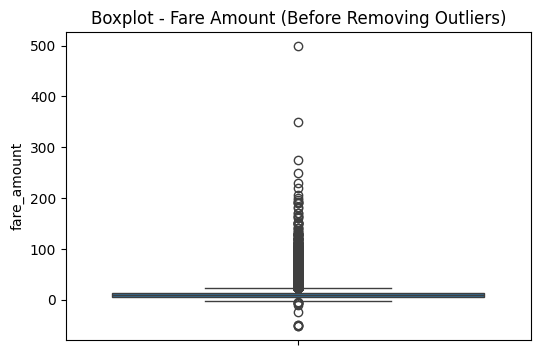

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(dataset['fare_amount'])
plt.title("Boxplot - Fare Amount (Before Removing Outliers)")
plt.show()  

In [11]:
dataset = dataset[(dataset['fare_amount'] > 0) & (dataset['fare_amount'] < 100)]
print("Shape after removing outliers:", dataset.shape)

Shape after removing outliers: (199887, 3)


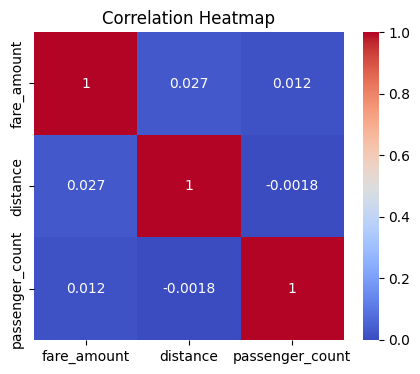

In [12]:
plt.figure(figsize=(5,4))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [13]:
X = dataset[['distance', 'passenger_count']]
y = dataset['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 159909
Testing samples: 39978


In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [15]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [16]:
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

In [17]:
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

In [18]:
print("\n===== MODEL PERFORMANCE =====")
print(f"Linear Regression -> R2: {r2_lr:.3f}, RMSE: {rmse_lr:.3f}")
print(f"Random Forest Regression -> R2: {r2_rf:.3f}, RMSE: {rmse_rf:.3f}")


===== MODEL PERFORMANCE =====
Linear Regression -> R2: 0.001, RMSE: 9.340
Random Forest Regression -> R2: 0.693, RMSE: 5.173


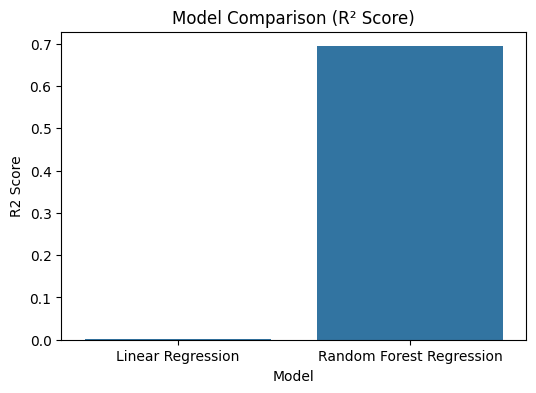

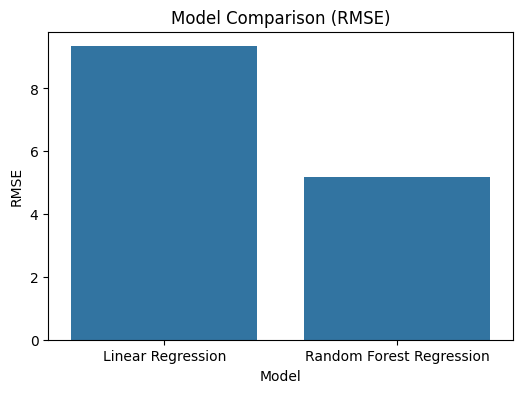

In [19]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regression'],
    'R2 Score': [r2_lr, r2_rf],
    'RMSE': [rmse_lr, rmse_rf]
})

plt.figure(figsize=(6,4))
sns.barplot(x='Model', y='R2 Score', data=results)
plt.title("Model Comparison (R² Score)")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x='Model', y='RMSE', data=results)
plt.title("Model Comparison (RMSE)")
plt.show()